### Lab 7 - K-Means Clustering

The healthy_lifestyle dataset contains information on lifestyle measures such as amount of sunshine, pollution, and happiness levels for 44 major cities around the world. Apply k-means clustering to the cities' number of hours of sunshine and happiness levels.

Import the needed packages for clustering.  
Initialize and fit a k-means clustering model using sklearn's Kmeans() function.  
Use the user-defined number of clusters, init='random', n_init=10, random_state=123, and algorithm='elkan'.  
Find the cluster centroids and inertia.  
Create a matplotlib scatterplot that will show the clusters in different colors and the centroids, similar to the image below.

```python
Ex: If the input is:

4
the output should be:

Centroids: [[ 0.8294  0.2562]
 [ 1.3106 -1.887 ]
 [-0.9471  0.8281]
 [-0.6372 -0.7943]]
Inertia: 16.4991
```


![My Image](../images/kmeans.png)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
healthy = pd.read_csv('data/healthy_lifestyle.csv')

In [3]:
# Input the number of clusters
number = int(input())

In [4]:
# Use StandardScaler() to standardize input features
X = healthy[['sunshine_hours', 'happiness_levels']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['sunshine_hours', 'happiness_levels'])
X = X.dropna()

In [5]:
# Initialize a k-means clustering algorithm with a user-defined number of clusters, init='random', n_init=10, 
# random_state=123, and algorithm='elkan'
kmeans = KMeans(n_clusters=number, init='random', n_init=10, random_state=123, algorithm='elkan')

# Fit the algorithm to the input features
kmeans.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=4, n_init=10,
       random_state=123)

In [6]:
# Find and print the cluster centroids
centroid = kmeans.cluster_centers_
print("Centroids:", np.round(centroid,4))

# Find and print the cluster inertia
inertia = kmeans.inertia_
print("Inertia:", np.round(inertia,4))

Centroids: [[-0.9471  0.8281]
 [ 0.8294  0.2562]
 [ 1.3106 -1.887 ]
 [-0.6372 -0.7943]]
Inertia: 16.4991


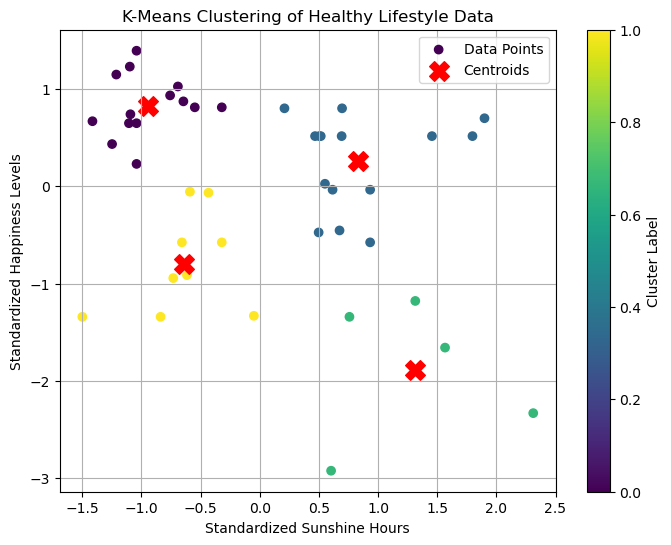

In [7]:
# Add cluster labels to the dataset
X['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
# Scatter plot for X here
# Add in centroids here
plt.scatter(X['sunshine_hours'], X['happiness_levels'], c=X['Cluster'], cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroid[:, 0], centroid[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.title('K-Means Clustering of Healthy Lifestyle Data')
plt.xlabel('Standardized Sunshine Hours')
plt.ylabel('Standardized Happiness Levels')
plt.legend()
plt.show()